In [5]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

# Нормальность распределения

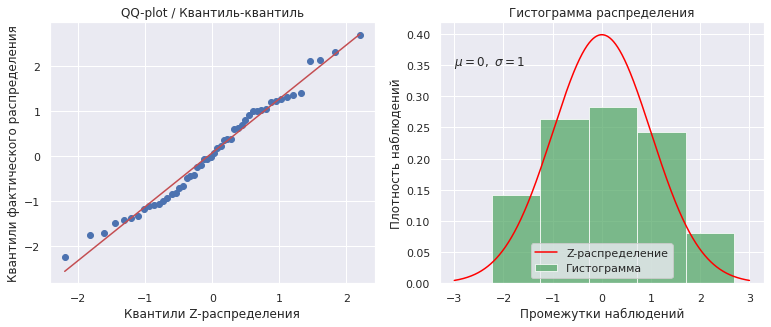

Тест Шапиро-Уилка 0.5222463011741638


In [16]:
mean = 0  # Мат. ожидание
sd = 1    # Стандартное отклонение

# Построим график QQ-plot
sample = np.random.normal(loc=mean, scale=sd, size=50)  # Генерация нормального распределения 

plt.figure(figsize = [6.4*2, 4.8]) 
plt.subplot(1, 2, 1)

stats.probplot(sample, dist="norm", plot=plt)  # Создаем график QQ-plot 
plt.title('QQ-plot / Квантиль-квантиль') 
plt.xlabel('Квантили Z-распределения') 
plt.ylabel('Квантили фактического распределения')  
plt.grid(True)

# Построим гистограмму
plt.subplot(1, 2, 2)

n, bins, patches = plt.hist(sample, 5, density=True, facecolor='g', alpha=0.75, label='Гистограмма')  # Cтроим гистограмму
plt.title('Гистограмма распределения') 
plt.xlabel('Промежутки наблюдений')  
plt.ylabel('Плотность наблюдений')  
plt.text(-3, 0.35, r'$\mu=0,\ \sigma=1$') 
plt.grid(True)  

# Построим поверх гистограммы график Z-распределения
x = np.linspace(mean - 3*sd, mean + 3*sd, 1000)  
plt.plot(x, stats.norm.pdf(x, mean, sd), color='red', label='Z-распределение')  

plt.legend() 
plt.show() 

print('Тест Шапиро-Уилка:', stats.shapiro(sample)[1])

# Однофакторный дисперсионный анализ

Генотерапия позволяет корректировать работу дефектного гена, ответственного за развитие заболевания. В эксперименте сравнивалась эффективность четырех различных типов терапии. Результаты исследования представлены в таблице:

In [139]:
URL = 'https://stepik.org/media/attachments/lesson/8083/genetherapy.csv'
data = pd.read_csv(URL)

In [140]:
#строим таблицу
df = pd.DataFrame({'Терапия':['A','B','C','D'], 'N':[data[data["Therapy"] == x]["Therapy"].count() for x in ['A','B','C','D'] ]})
# Находим среднее для всех терапий
df['Mx']= list(round(data.groupby('Therapy')['expr'].mean(), 2))
# Находим стандартное отклонение для всех терапий
df['SD']= list(round(np.std(data[data["Therapy"] == x]["expr"]), 2) for x in ['A','B','C','D'] )
df

,Терапия,N,Mx,SD
0,A,15,99.73,4.02
1,B,15,98.80,5.69
2,C,15,94.40,5.02
3,D,15,92.33,3.61


Результаты дисперсионного анализа:

In [138]:
A = data[data["Therapy"] == "A"]["expr"]
B = data[data["Therapy"] == "B"]["expr"]
C = data[data["Therapy"] == "C"]["expr"]
D = data[data["Therapy"] == "D"]["expr"]
stats.f_oneway(A, B, C, D)

F_onewayResult(statistic=8.03730248114399, pvalue=0.00015249722895229536)

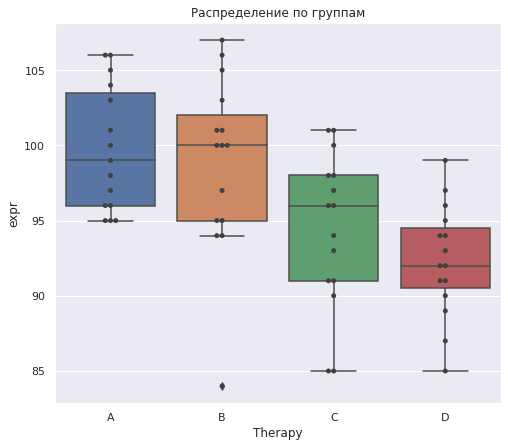

In [26]:
sns.set(rc={'figure.figsize':(8,7)})
ax = (sns.boxplot(x="Therapy", y="expr", data=data)).set(xlabel='Группа', ylabel='Значения в эксперименте', title='Распределение по группам')
ax = sns.swarmplot(x="Therapy", y="expr",data=data, color=".25")

**Удалось выявить статистически значимую взаимосвязь типа терапии с показателем уровня экспрессии гена ( F(3, 56)=8,04;  pvalue<0.05)**

#  Многофакторный ANOVA

In [3]:
URL = 'https://stepik.org/media/attachments/lesson/9250/atherosclerosis.csv'
data = pd.read_csv(URL)
data

,expr,age,dose
0,107.351478,1,D1
1,104.504438,1,D1
2,103.435134,1,D1
3,109.572882,1,D1
4,114.993803,1,D1
...,...,...,...
59,101.851582,2,D2
60,105.239530,2,D2
61,99.350198,2,D2
62,108.091455,2,D2


Результаты дисперсионного анализа:

In [6]:
#perform two-way ANOVA
model = ols('expr ~ age + dose + age:dose', data=data).fit()
sm.stats.anova_lm(model, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
dose,1.0,16.912241,16.912241,0.638094,0.427552
age,1.0,197.452754,197.452754,7.449841,0.008313
age:dose,1.0,0.927077,0.927077,0.034978,0.852272
Residual,60.0,1590.257424,26.504290,NaN,NaN


**Значимый эффект для фактора возраста пациентов ( F(1,61)=7,45, p<0.05 )**

**Незначимый эффект для фактора дозировки ( F(1,61)=0,63, p>0.05 )**